In [3]:
!pip install qutip matplotlib numpy

import numpy as np
import matplotlib.pyplot as plt
from qutip import *

print("🔬 Advanced QuTip Tutorial: Quantum Dynamics & Entanglement")
print("=" * 60)

🔬 Advanced QuTip Tutorial: Quantum Dynamics & Entanglement


In [4]:
print("\n1. Creating Quantum States")
ground = basis(2, 0)
excited = basis(2, 1)
plus = (ground + excited).unit()
minus = (ground - excited).unit()

print(f"Ground state |0⟩: {ground.dag()}")
print(f"Superposition |+⟩: {plus.dag()}")

bell_phi_plus = (tensor(ground, ground) + tensor(excited, excited)).unit()
bell_psi_minus = (tensor(ground, excited) - tensor(excited, ground)).unit()

print(f"\nBell state |Φ+⟩ = (|00⟩ + |11⟩)/√2")
rho_bell = bell_phi_plus * bell_phi_plus.dag()
print(f"Entanglement measure: {concurrence(rho_bell):.3f}")


1. Creating Quantum States
Ground state |0⟩: Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[1. 0.]]
Superposition |+⟩: Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[0.70710678 0.70710678]]

Bell state |Φ+⟩ = (|00⟩ + |11⟩)/√2
Entanglement measure: 1.000


In [5]:
print("\n2. Quantum Gates and Operations")
sx, sy, sz = sigmax(), sigmay(), sigmaz()
print(f"Pauli-X matrix:\n{sx}")

hadamard = (sx + sz) / np.sqrt(2)
cnot = tensor(fock_dm(2, 0), qeye(2)) + tensor(fock_dm(2, 1), sx)

h_ground = hadamard * ground
print(f"\nH|0⟩ = {h_ground.dag()}")


2. Quantum Gates and Operations
Pauli-X matrix:
Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 1.]
 [1. 0.]]

H|0⟩ = Quantum object: dims=[[1], [2]], shape=(1, 2), type='bra', dtype=Dense
Qobj data =
[[0.70710678 0.70710678]]



3. Quantum Dynamics: Rabi Oscillations


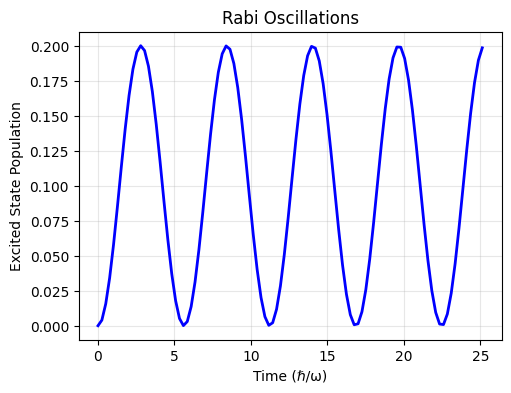

In [6]:
print("\n3. Quantum Dynamics: Rabi Oscillations")
omega_0 = 1.0
omega_r = 0.5

H = 0.5 * omega_0 * sz + 0.5 * omega_r * sx

t_list = np.linspace(0, 4*np.pi/omega_r, 100)
psi0 = ground
result = mesolve(H, psi0, t_list, [], [])

excited_pop = [expect(fock_dm(2, 1), state) for state in result.states]

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(t_list, excited_pop, 'b-', linewidth=2)
plt.xlabel('Time (ℏ/ω)')
plt.ylabel('Excited State Population')
plt.title('Rabi Oscillations')
plt.grid(True, alpha=0.3)


4. Quantum Harmonic Oscillator


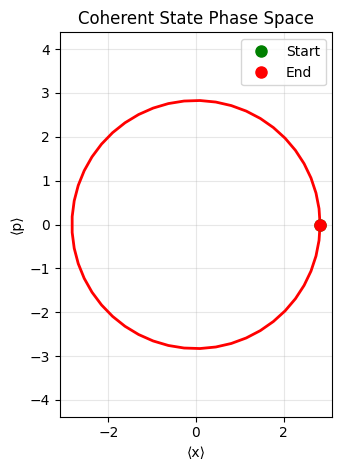

In [7]:
print("\n4. Quantum Harmonic Oscillator")
N = 20
a = destroy(N)
H_ho = a.dag() * a + 0.5

alpha = 2.0
psi0_coh = coherent(N, alpha)

t_list_ho = np.linspace(0, 2*np.pi, 50)
result_ho = mesolve(H_ho, psi0_coh, t_list_ho, [], [])

x_op = (a + a.dag()) / np.sqrt(2)
p_op = 1j * (a.dag() - a) / np.sqrt(2)

x_expect = [expect(x_op, state) for state in result_ho.states]
p_expect = [expect(p_op, state) for state in result_ho.states]

plt.subplot(1, 2, 2)
plt.plot(x_expect, p_expect, 'r-', linewidth=2)
plt.plot(x_expect[0], p_expect[0], 'go', markersize=8, label='Start')
plt.plot(x_expect[-1], p_expect[-1], 'ro', markersize=8, label='End')
plt.xlabel('⟨x⟩')
plt.ylabel('⟨p⟩')
plt.title('Coherent State Phase Space')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()


5. Quantum Decoherence and Open Systems


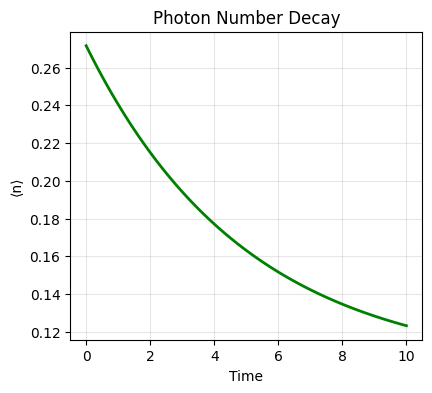

In [8]:
print("\n5. Quantum Decoherence and Open Systems")
gamma = 0.2
n_th = 0.1

c_ops = [np.sqrt(gamma * (1 + n_th)) * a, np.sqrt(gamma * n_th) * a.dag()]

psi0_sq = squeeze(N, 0.5) * basis(N, 0)

t_list_damp = np.linspace(0, 10, 100)
result_damp = mesolve(H_ho, psi0_sq, t_list_damp, c_ops, [])

n_expect = [expect(a.dag() * a, state) for state in result_damp.states]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(t_list_damp, n_expect, 'g-', linewidth=2)
plt.xlabel('Time')
plt.ylabel('⟨n⟩')
plt.title('Photon Number Decay')
plt.grid(True, alpha=0.3)


6. Wigner Function Visualization


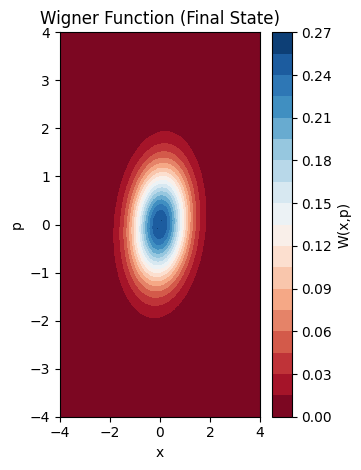

In [9]:
print("\n6. Wigner Function Visualization")
final_state = result_damp.states[-1]
xvec = np.linspace(-4, 4, 50)
W_final = wigner(final_state, xvec, xvec)

plt.subplot(1, 2, 2)
plt.contourf(xvec, xvec, W_final, 20, cmap='RdBu')
plt.colorbar(label='W(x,p)')
plt.xlabel('x')
plt.ylabel('p')
plt.title('Wigner Function (Final State)')

plt.tight_layout()
plt.show()


7. Entanglement Dynamics


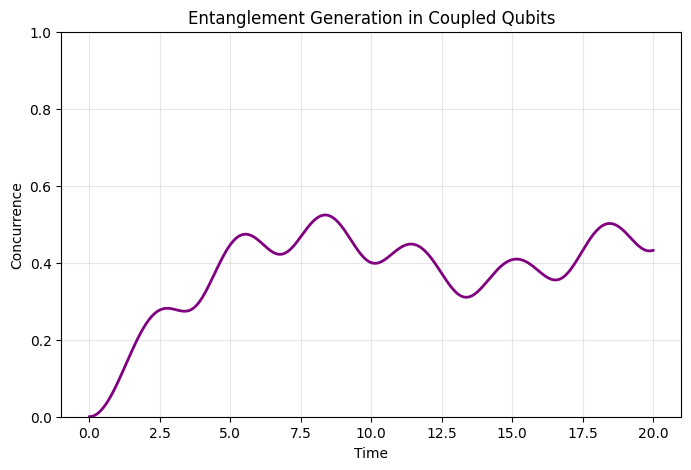

In [10]:
print("\n7. Entanglement Dynamics")
omega1, omega2 = 1.0, 1.1
g = 0.1

H_coupled = (omega1/2 * tensor(sz, qeye(2)) +
             omega2/2 * tensor(qeye(2), sz) +
             g * tensor(sx, sx))

psi0_prod = tensor(plus, ground)

t_list_ent = np.linspace(0, 20, 200)
result_ent = mesolve(H_coupled, psi0_prod, t_list_ent, [], [])

entanglement = [concurrence(state * state.dag()) for state in result_ent.states]

plt.figure(figsize=(8, 5))
plt.plot(t_list_ent, entanglement, 'purple', linewidth=2)
plt.xlabel('Time')
plt.ylabel('Concurrence')
plt.title('Entanglement Generation in Coupled Qubits')
plt.grid(True, alpha=0.3)
plt.ylim(0, 1)
plt.show()

In [11]:
print("\n8. Summary of Advanced Features Demonstrated:")
print("✓ Quantum state preparation and manipulation")
print("✓ Time evolution with mesolve()")
print("✓ Rabi oscillations in two-level systems")
print("✓ Coherent states and harmonic oscillators")
print("✓ Open quantum systems with decoherence")
print("✓ Wigner function visualization")
print("✓ Entanglement quantification and dynamics")

print(f"\n🎯 Tutorial complete! Explored {len(t_list_ent)} time steps")
print("Try modifying parameters to explore different quantum phenomena!")

print("\n💡 Advanced Exercises:")
print("1. Implement quantum error correction codes")
print("2. Simulate quantum algorithms (Grover, Shor)")
print("3. Explore cavity QED with Jaynes-Cummings model")
print("4. Study quantum phase transitions")
print("5. Implement quantum feedback control")


8. Summary of Advanced Features Demonstrated:
✓ Quantum state preparation and manipulation
✓ Time evolution with mesolve()
✓ Rabi oscillations in two-level systems
✓ Coherent states and harmonic oscillators
✓ Open quantum systems with decoherence
✓ Wigner function visualization
✓ Entanglement quantification and dynamics

🎯 Tutorial complete! Explored 200 time steps
Try modifying parameters to explore different quantum phenomena!

💡 Advanced Exercises:
1. Implement quantum error correction codes
2. Simulate quantum algorithms (Grover, Shor)
3. Explore cavity QED with Jaynes-Cummings model
4. Study quantum phase transitions
5. Implement quantum feedback control
